<a href="https://colab.research.google.com/github/OscarRojasG/ADA-Informes/blob/main/Informe10-StronglyConnectedComponents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [181]:
import networkx as nx

def generarGrafoAleatorio(n):
  labels = dict()

  G = nx.gnp_random_graph(10,0.2,directed=True)
  for n in G.nodes():
    G.nodes[n]['label'] = chr(ord('a') + n)
    G.nodes[n]['letra'] = chr(ord('a') + n)
    G.nodes[n]['state'] = 0

  for e in G.edges():
    if G.has_edge(e[1],e[0]):
      G.remove_edge(e[1],e[0])

  return G

In [182]:
def dibujarGrafo(G):
  labels = nx.get_node_attributes(G, 'label')
  pos = nx.spring_layout(G,k=10,seed=1)

  nx.draw(G, pos, with_labels=True, labels=labels, font_size=10,
          node_size=1000, node_color='white', edgecolors='black')

In [183]:
# Estados de los nodos:
# 0: no descubierto
# 1: descubierto
# 2: visitado

def DFS(G, initial, count):
  nodes = list()

  S = list()
  S.append(initial)

  while len(S) > 0:
    n = S.pop()

    if G.nodes[n]['state'] == 0:
      G.nodes[n]['state'] = 1
      S.append(n)

      for adj in reversed(list(G[n])):
        if G.nodes[adj]['state'] == 0:
          S.append(adj)

    elif G.nodes[n]['state'] == 1:
      G.nodes[n]['label'] = chr(ord('a') + n) + '\n' + str(count)
      G.nodes[n]['state'] = 2
      nodes.insert(0, n)
      count += 1

  return nodes, count

In [188]:
def obtenerComponentesConexos(G):
  count = 1
  nodos_etiqueta = list()

  for n in G.nodes():
    G.nodes[n]['state'] = 0

  for n in G.nodes():
    if G.nodes[n]['state'] == 0:
      nodos, count = DFS(G, n, count)
      nodos_etiqueta = nodos + nodos_etiqueta

  T = G.reverse()
  for n in T.nodes():
    T.nodes[n]['state'] = 0

  for n in nodos_etiqueta:
    if T.nodes[n]['state'] == 0:
      nodos = DFS(T, n, count)[0]
      for x in nodos:
        print(T.nodes[x]['letra'], end=' ')
      print()

In [191]:
G = generarGrafoAleatorio(10)

i 
a 
c j e d f b 
h 
g 


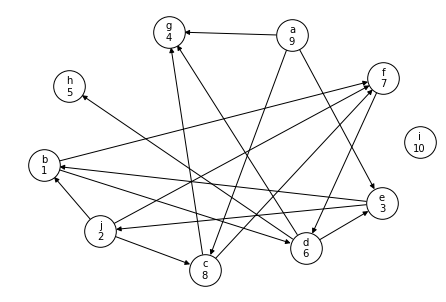

In [192]:
obtenerComponentesConexos(G)
dibujarGrafo(G)